## Data Walkthrough Lab

***

## Project Description

In this lab, we’ll sort variables, average variables, and explore the relationship between two different
variables using our car data from the lesson. We’ll also play around a bit with visualizing our data in a
scatterplot.

model = name of car model
mpg = gas mileage, in miles per (US) gallon
cyl = number of cylinders
disp = displacement, in cubic inches
hp = gross horsepower
drat = rear axle ratio
wt = weight, in thousands of pounds (1000 lb)
qsec = 1/4 mile time
vs = engine (0 = V-shaped, 1 = straight)
am = transmission (0 = automatic, 1 = manual)
gear = number of forward gears
carb = number of carburetors

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

#import os
#import zipfile
import scipy.stats

# import pandas_profiling
# from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Mod2Labs.csv")

In [3]:
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Knight X,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
1,Knight X Wagon,21.00,6,160.00,110,3.90,2.88,17.02,0,1,4,4
2,Hercules 100,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
3,Wasp 4WD,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1
4,Wasp Supersport,18.70,8,360.00,175,3.15,3.44,17.02,0,0,3,2
5,El Pasion,18.10,6,225.00,105,2.76,3.46,20.22,1,0,3,1
6,Road Devil,14.30,8,360.00,245,3.21,3.57,15.84,0,0,3,4
7,Anansi 100,24.40,4,146.70,62,3.69,3.19,20.00,1,0,4,2
8,Anansi 200,22.80,4,140.80,95,3.92,3.15,22.90,1,0,4,2
9,Anansi 200x,19.20,6,167.60,123,3.92,3.44,18.30,1,0,4,4


In [4]:
df.sort_values(by="mpg")

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15,Seaward,10.40,8,460.00,215,3.00,5.42,17.82,0,0,3,4
14,Clydesdale Turbo,10.40,8,472.00,205,2.93,5.25,17.98,0,0,3,4
23,Osprey Z-7,13.30,8,350.00,245,3.73,3.84,15.41,0,0,3,4
6,Road Devil,14.30,8,360.00,245,3.21,3.57,15.84,0,0,3,4
16,Commonwealth 360,14.70,8,440.00,230,3.23,5.34,17.42,0,0,3,4
30,Stegosaurus Diesel,15.00,8,301.00,335,3.54,3.57,14.60,0,1,5,8
13,Anansi 400x,15.20,8,275.80,180,3.07,3.78,18.00,0,0,3,3
22,Tiara,15.20,8,304.00,150,3.15,3.44,17.30,0,0,3,2
21,Reisender Bluebird,15.50,8,318.00,150,2.76,3.52,16.87,0,0,3,2
28,Destiny Model 23,15.80,8,351.00,264,4.22,3.17,14.50,0,1,5,4


In [5]:
df.sort_values(by="wt")

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Excalibur Phantom,30.40,4,95.10,113,3.77,1.51,16.90,1,1,5,2
18,Birchwood AWD,30.40,4,75.70,52,4.93,1.61,18.52,1,1,4,2
19,Empire Baroness,33.90,4,71.10,65,4.22,1.83,19.90,1,1,4,1
25,Apocalypse 100,27.30,4,79.00,66,4.08,1.94,18.90,1,1,4,1
26,Prince of Thieves,26.00,4,120.30,91,4.43,2.14,16.70,0,1,5,2
17,Lance Roughrider,32.40,4,78.70,66,4.08,2.20,19.47,1,1,4,1
2,Hercules 100,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
20,Empire Duchess,21.50,4,120.10,97,3.70,2.46,20.01,1,0,3,1
0,Knight X,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
29,Stegosaurus,19.70,6,145.00,175,3.62,2.77,15.50,0,1,5,6


In [6]:
df.sort_values(by="cyl")

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
31,Sword of Damocles,21.40,4,121.00,109,4.11,2.78,18.60,1,1,4,2
2,Hercules 100,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
27,Excalibur Phantom,30.40,4,95.10,113,3.77,1.51,16.90,1,1,5,2
26,Prince of Thieves,26.00,4,120.30,91,4.43,2.14,16.70,0,1,5,2
25,Apocalypse 100,27.30,4,79.00,66,4.08,1.94,18.90,1,1,4,1
20,Empire Duchess,21.50,4,120.10,97,3.70,2.46,20.01,1,0,3,1
7,Anansi 100,24.40,4,146.70,62,3.69,3.19,20.00,1,0,4,2
8,Anansi 200,22.80,4,140.80,95,3.92,3.15,22.90,1,0,4,2
19,Empire Baroness,33.90,4,71.10,65,4.22,1.83,19.90,1,1,4,1
18,Birchwood AWD,30.40,4,75.70,52,4.93,1.61,18.52,1,1,4,2


In [7]:
df.cyl.mean()

6.1875

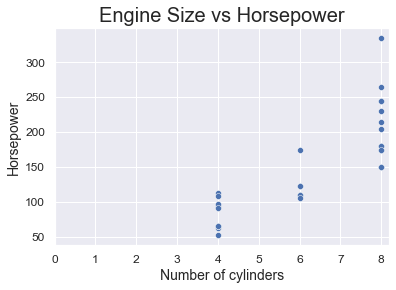

In [8]:
plt.figure()
plt.title("Engine Size vs Horsepower", size=20)
sns.scatterplot(x="cyl",y="hp",data=df)
plt.xlabel("Number of cylinders")
plt.ylabel("Horsepower")
plt.xlim(0,)
plt.show()

In [9]:
df[["cyl","hp"]].corr()

,cyl,hp
cyl,1.00,0.83
hp,0.83,1.00


In [10]:
df[["cyl","mpg"]].corr()

,cyl,mpg
cyl,1.00,-0.85
mpg,-0.85,1.00


In [11]:
df["wt"].mean()

3.2172499999999995

In [12]:
df[["gear","carb"]].corr()

,gear,carb
gear,1.00,0.27
carb,0.27,1.00


#### Python code done by Dennis Lam